# NLP Toolkits and Preprocessing Exercises

## Introduction

Acknowledgement: This notebook is adapted from  Intel AI Developer Program

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. 

The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [58]:
import nltk
#nltk.download()  <-- Run this if it's your first time using nltk to download all of the datasets and models

import pandas as pd
import re
import string

In [87]:
data = pd.read_csv('./data/cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


### Get a general understanding of the data

Generally, before we start to work on the data, it will be good to get a general appreciation
of the shape of the data. We can for example try to seek answers to the following questions.
* How many reviews there are in total.
* What is the percent of 1, 2, 3, 4 and 5 star reviews.
* What is distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

In [88]:
# There are 913 reviews total
len(data)

913

In [89]:
# This cookie got great reviews overall, with 68% of users giving it 5 stars
data.stars.value_counts(normalize=True)

5    0.683461
4    0.237678
3    0.061336
2    0.013143
1    0.004381
Name: stars, dtype: float64

In [90]:
# This tells us that there were 10 reviews that had 134 characters
data.reviews.map(len).value_counts().head()

134    10
157     9
137     8
107     8
132     8
Name: reviews, dtype: int64

In [91]:
# Import seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

%matplotlib inline

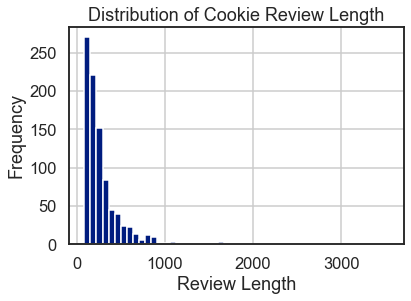

In [92]:
# This creates a histogram of all of the review lengths
ax = data.reviews.map(len).hist(bins=50)
ax.set(xlabel='Review Length', ylabel='Frequency', title='Distribution of Cookie Review Length');

- Now, let's take a look at the review itself.
- We can use data.head() and data.tail() to see the first 5 and last 5 rows of the data

In [93]:
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


In [94]:
data.tail()

,user_id,stars,reviews
908,A366PSH7KFLRPB,5,I loved these cookies and so did my kids. You ...
909,A2KV6EYQPKJRR5,5,This is a great tasting cookie. It is very sof...
910,A3O7REI0OSV89M,4,These are great for a quick snack! They are sa...
911,A9JS5GQQ6GIQT,5,I love the Quaker soft baked cookies. The rea...
912,AMAVEZAGCH52H,5,This cookie is really good and works really we...


In [95]:
# The dataframe contains data starting with row index 0. There are three columns, the last one is at col #2
# To see a review for row 2, we use data.iloc[1,2]

In [96]:

data.iloc[1,2]

'Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I\'d had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn\'t feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and conta

## Question 1 

#### TODO
- Write a for-loop to print out the the review
- What do  you notice about the "structure" of the the review text. 
- What non-English terms do you observe hint: look at data.iloc[i,2]

In [97]:
# Your codes

In [98]:
for i in range(0,900):
    print(data.iloc[i,2])
    print (" ")

I love these cookies!  Not only are they healthy but they taste great and are so soft!  I will definitely add these to my grocery list!
 
Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I'd had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn't feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutri

## Question 2 ##
Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Remove HTML tags such as BR
     5. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
  
  You may wish to refer to the notebook Tips_and_Tricks to see how you can lambda function and Pandas map method
     


In [99]:
# This review needs to be heavily-cleaned
data.iloc[1,2]

'Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I\'d had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn\'t feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and conta

#### TODO
* Remove words containing numbers and replace with a single space (use regular expresson)
* Then, update the dataframe column(series) reviews with the new 
* Finally, convert to lower cases

In [100]:
# sample codes
text = "word word123 123word  word456 789word morewords"
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
new_text = lower_alpha(text)
print (new_text)

lower_alpha2 = lambda x: re.sub("\w*\d\w*", ' ', x.lower())
new_text = lower_alpha(text)
print (new_text)

word          morewords
word          morewords


In [101]:
# Your codes

In [102]:
# This regular expression removes all words with numbers in them and also makes all words lowercase
import re

lower_alpha = lambda x: re.sub("\w*\d\w*", ' ', x.lower())
data['reviews_no_number_lowercase'] = data.reviews.map(lower_alpha)
data['reviews'] = data.reviews.map(lower_alpha)

data.head()

,user_id,stars,reviews,reviews_no_number_lowercase
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...,i love these cookies! not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these. i was very pleased to giv...,my kids loved these. i was very pleased to giv...


 #### TODO
 * Insert your codes to remove all punctuations. 
 * Check if the text in data.iloc[1,2] is looking cleaner now

In [75]:
# Your codes

In [115]:
# This regular expression removes all punctuation
import string

#punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
punc_re = lambda x: re.sub(r"""[\.\,"'\)]""", ' ', x)

data['reviews'] = data.reviews.map(punc_re)

data.head()

,user_id,stars,reviews,reviews_no_number_lowercase
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...,i love these cookies! not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,my kids loved these. i was very pleased to giv...


In [116]:
# This is the review after cleaning
data.iloc[1,2]

'quaker soft baked oatmeal cookies with raisins are a delicious treat  great for anytime of day   for example:<br /><br />--at breakfast  i had one with a large banana and a cup of coffee  and felt i d had a relatively  healthy  start to the day <br /><br />--the next day at lunch  following a tuna sandwich  i had one with a glass of milk  and was satisfied enough to not need a snack before dinner at  :  <br /><br />--the following night  after dinner  i had one with the remainder of my glass of wine  (delicious!  and again  didn t feel the need to snack later in the evening <br /><br />each cookie is individually packaged  and their texture is soft and moist  with just the right amount of sweetness  natural flavors used in the making are cinnamon and all spice   these flavorings give the cookies a real old-fashioned  homemade taste <br /><br />nutritionally  the cookies have   calories each      saturated fat    mg sodium  and   sugar  they also have   of protein  and contain   of fib

#### TODO
- Remove HTML tags such as  BR 


In [120]:
# It looks like there are a lot of <br> hanging around. Let's get rid of them.

remove_br = lambda x: re.sub(r"""<br />""", ' ', x.lower())
data['reviews'] = data.reviews.map(remove_br)

data.head()

,user_id,stars,reviews,reviews_no_number_lowercase
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...,i love these cookies! not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,my kids loved these. i was very pleased to giv...


In [121]:
# The review is starting to look pretty good!
data.iloc[1,2]

'quaker soft baked oatmeal cookies with raisins are a delicious treat  great for anytime of day   for example:  --at breakfast  i had one with a large banana and a cup of coffee  and felt i d had a relatively  healthy  start to the day   --the next day at lunch  following a tuna sandwich  i had one with a glass of milk  and was satisfied enough to not need a snack before dinner at  :    --the following night  after dinner  i had one with the remainder of my glass of wine  (delicious!  and again  didn t feel the need to snack later in the evening   each cookie is individually packaged  and their texture is soft and moist  with just the right amount of sweetness  natural flavors used in the making are cinnamon and all spice   these flavorings give the cookies a real old-fashioned  homemade taste   nutritionally  the cookies have   calories each      saturated fat    mg sodium  and   sugar  they also have   of protein  and contain   of fiber   while the calorie count may seem a bit high f

#### TODO
Finally, you can tokenize the reviews into words.
- Use nltk to perform the word tokenization
- insert the list of tokens into a new column (series) call tokens

In [122]:
# Tokenize the reviews into words.

from nltk.tokenize import word_tokenize

data['tokens'] = data.reviews.map(word_tokenize)
data.head()

,user_id,stars,reviews,reviews_no_number_lowercase,tokens
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...,i love these cookies! not only are they healt...,"[i, love, these, cookies, !, not, only, are, t..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,i participated in a product review that includ...,"[i, participated, in, a, product, review, that..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,my kids loved these. i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased..."


### Get a general understanding of the tokens (words)
Do not make changes to the cells below. These codes will give you a feel of the text.

* Find the most common words.
* Determine the word length distribution over the entire corpus.
* The solution is given below, It assumes that the tokens are found in the column token.

In [26]:
# This creates one huge list by combining all of the tokens values
word_list = sum(data.tokens.tolist(), [])

word_list[:10]

['i',
 'love',
 'these',
 'cookies',
 'not',
 'only',
 'are',
 'they',
 'healthy',
 'but']

In [27]:
# These are the steps to find the most common words

from collections import Counter

# Converts list to a dictionary with value counts
word_counts = Counter(word_list)

# Reverse the key/values in the dictionary for sorting
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Sort the list by count
word_counts = sorted(word_counts, reverse=True)

# Prints the 10 most commons words
word_counts[:10]

[(2145, 'i'),
 (1755, 'and'),
 (1652, 'the'),
 (1310, 'a'),
 (1028, 'it'),
 (991, 'to'),
 (845, 'my'),
 (843, 'cookies'),
 (842, 'cookie'),
 (780, 'of')]

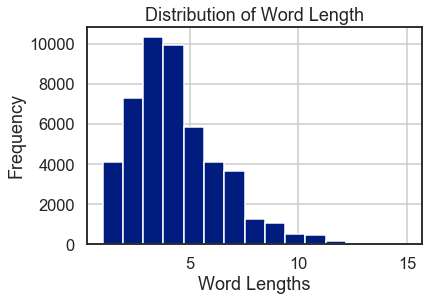

In [28]:
# The distribution of word lengths
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform  lemmatization [skip stemming]
     * Perform  lemmization considering parts of speech tagging [optional]
     
  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

#### TODO
- Remove stop words

In [29]:
# Your codes

In [123]:
# Remove stop words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words = ['word1', 'word2']    
stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop'] = data.tokens.apply(stop_lambda)
#data['tokens_stop_map'] = data.tokens.map(stop_lambda)

data.head()

,user_id,stars,reviews,reviews_no_number_lowercase,tokens,tokens_stop,tokens_stop_map
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...,i love these cookies! not only are they healt...,"[i, love, these, cookies, !, not, only, are, t...","[love, cookies, !, healthy, taste, great, soft...","[love, cookies, !, healthy, taste, great, soft..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[quaker, soft, baked, oatmeal, cookies, raisin..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[usually, huge, fan, oatmeal, cookies, literal..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[participated, product, review, included, samp..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,my kids loved these. i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[kids, loved, pleased, give, kids, quick, go, ..."


#### TODO 
* Perform  basic lemmatization

In [31]:

from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatizer_lambda = lambda x: [lemmatizer.lemmatize(y) for y in x]
data['tokens_lemma_simple'] = data.tokens_stop.apply(lemmatizer_lambda)

data.head()

,user_id,stars,reviews,tokens,tokens_stop,tokens_lemma_simple
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[love, cooky, healthy, taste, great, soft, def..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[quaker, soft, baked, oatmeal, cooky, raisin, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[usually, huge, fan, oatmeal, cooky, literally..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[participated, product, review, included, samp..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[kid, loved, pleased, give, kid, quick, go, he..."


#### TODO
Lemmitization can be more accurate if Part of Speech (POS) information is available.
The general steps are:
- First, perform parts of speech tagging on the review
- Second, convert POS labels to something that can be recognize by Wordnet
- Third, apply lemmitization
- 
##### Perform lemmitization considering parts of speech tagging


In [32]:
# Parts of speech tagging

from nltk.tag import pos_tag

pos_lambda = lambda x: nltk.pos_tag(x)
data['tokens_pos'] = (data.tokens_stop.apply(pos_lambda))
data.head()

,user_id,stars,reviews,tokens,tokens_stop,tokens_lemma_simple,tokens_pos
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[love, cooky, healthy, taste, great, soft, def...","[(love, VB), (cookies, NNS), (healthy, JJ), (t..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[quaker, soft, baked, oatmeal, cooky, raisin, ...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[usually, huge, fan, oatmeal, cooky, literally...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[kid, loved, pleased, give, kid, quick, go, he...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."


In [33]:
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN



In [34]:
lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
data['tokens_lemma_with_pos'] = data.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])

# View the columns transposed
data.head().T

,0,1,2,3,4
user_id,A368Z46FIKHSEZ,A1JAPP1CXRG57A,A2Z9JNXPIEL2B9,A31CYJQO3FL586,A2KXQ2EKFF3K2G
stars,5,5,5,5,5
reviews,i love these cookies not only are they healt...,quaker soft baked oatmeal cookies with raisins...,i am usually not a huge fan of oatmeal cookies...,i participated in a product review that includ...,my kids loved these i was very pleased to giv...
tokens,"[i, love, these, cookies, not, only, are, they...","[quaker, soft, baked, oatmeal, cookies, with, ...","[i, am, usually, not, a, huge, fan, of, oatmea...","[i, participated, in, a, product, review, that...","[my, kids, loved, these, i, was, very, pleased..."
tokens_stop,"[love, cookies, healthy, taste, great, soft, d...","[quaker, soft, baked, oatmeal, cookies, raisin...","[usually, huge, fan, oatmeal, cookies, literal...","[participated, product, review, included, samp...","[kids, loved, pleased, give, kids, quick, go, ..."
tokens_lemma_simple,"[love, cooky, healthy, taste, great, soft, def...","[quaker, soft, baked, oatmeal, cooky, raisin, ...","[usually, huge, fan, oatmeal, cooky, literally...","[participated, product, review, included, samp...","[kid, loved, pleased, give, kid, quick, go, he..."
tokens_pos,"[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[(participated, JJ), (product, NN), (review, N...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."
tokens_lemma_with_pos,"[love, cooky, healthy, taste, great, soft, def...","[quaker, soft, bake, oatmeal, cooky, raisins, ...","[usually, huge, fan, oatmeal, cooky, literally...","[participated, product, review, include, sampl...","[kid, love, pleased, give, kid, quick, go, hea..."


## Question 4 ##

After going through these preprocessing steps, what are the most common words now? Do they make more sense?
Hint: You can reuse the codes from the section "Get a general understanding of the tokens (words)"

In [35]:
# Your codes

In [36]:
# Let's find the most common words after cleaning the data

# This creates one huge list by combining all of the tokens values
word_list_clean = sum(data.tokens_lemma_simple.tolist(), [])

word_list_clean[:10]

['love',
 'cooky',
 'healthy',
 'taste',
 'great',
 'soft',
 'definitely',
 'add',
 'grocery',
 'list']

In [37]:
from collections import Counter

# Converts list to a dictionary with value counts
word_counts_clean = Counter(word_list_clean)

# Reverse the key/values in the dictionary for sorting
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Sort the list by count
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Prints the 10 most commons words
word_counts_clean[:10]

[(843, 'cooky'),
 (842, 'cookie'),
 (707, 'soft'),
 (482, 'oatmeal'),
 (378, 'raisin'),
 (349, 'good'),
 (347, 'quaker'),
 (329, 'love'),
 (322, 'taste'),
 (307, 'like')]

These new top 10 words make a lot more sense and give us a good idea of what the corpus is about. Just by looking at these top 10 words, you can tell the corpus deals with delicious oatmeal cookies!